<h1 style="color:#FF0000;">How to Check for Stationarity in Time Series</h1>
Stationarity is a critical assumption for most time series models (e.g., ARIMA). A stationary series has:

1.   Constant mean (no trend)
2.   Constant variance (no heteroskedasticity)
3.   Autocorrelation structure that doesn’t change over time









In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [3]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Check data types of all columns to confirm conversion
data.dtypes

,0
Month,datetime64[ns]
Passengers,int64


In [5]:
# Set the 'Month' column as the index of the DataFrame
data.set_index('Month', inplace=True)

#Show Last Dataset
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<b><h2> 1. Visual Inspection (Plotting) </h2></b>

One of the simplest ways to check for stationarity is by visually inspecting the time series plot.

- **Plot the data over time** and observe the trend, seasonality, or any visible patterns.
- If the mean and variance appear to change over time, the series may be **non-stationary**.
- A stationary series typically shows **constant mean and variance** with no clear trend or seasonality.


<ipython-input-6-6227fa3c874a>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


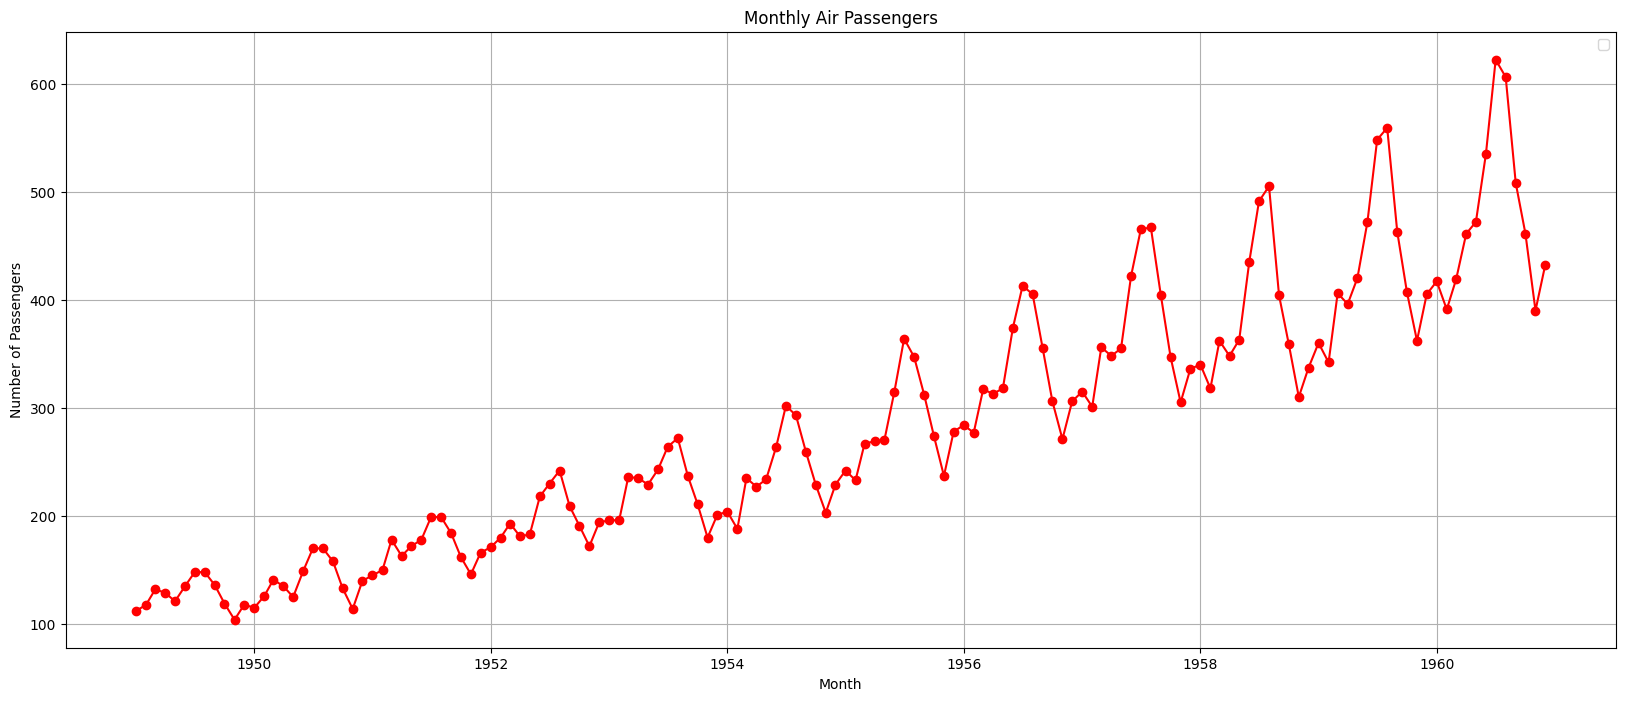

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(data.Passengers, marker='o', linestyle='-', color='r')
plt.title('Monthly Air Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

<b><h2> 2. Rolling Mean and Standard Deviation</h2></b>
</br>
Another way to check for stationarity is by examining the **rolling (or moving) mean and standard deviation**.

- In a **stationary time series**, the **mean and standard deviation remain constant** over time.
- By calculating the **rolling mean and standard deviation** over a fixed window, we can observe how these values change across the series.
- If the **rolling statistics fluctuate significantly**, the time series is likely **non-stationary**.
- If they stay relatively **flat and stable**, the series may be **stationary**.

This method provides a more objective way to identify changes in the underlying structure of the time series, especially when visual inspection is not conclusive.

> 📌 It's often used as a supporting technique alongside statistical tests like the Augmented Dickey-Fuller (ADF) test.


In [7]:
# Rolling statistics (window = 12 months)
rolling_mean = data['Passengers'].rolling(window=12).mean()
rolling_std = data['Passengers'].rolling(window=12).std()

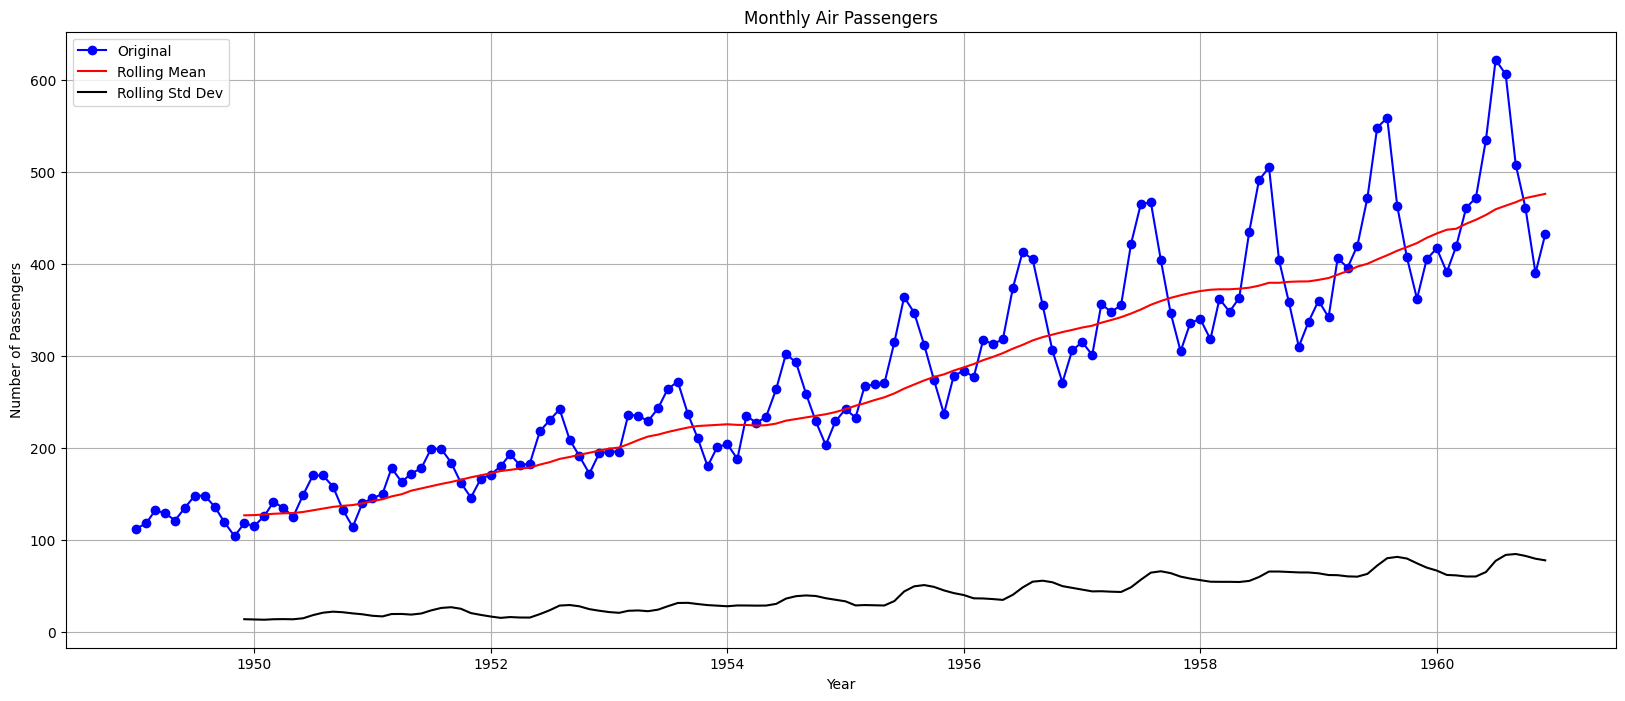

In [8]:
plt.figure(figsize=(20, 8))
plt.plot( data['Passengers'], marker='o', linestyle='-', color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Monthly Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

```
Explanation for this result - Visual Inspection Using Rolling Statistics
```
One common approach to check for stationarity is to **visually inspect the time series using rolling statistics** — specifically, the rolling mean and rolling standard deviation.

The plot below shows the monthly **AirPassengers** time series, along with its rolling mean and rolling standard deviation.

**Key observations:**

- **Blue line:** Original time series (monthly number of passengers)
- **Red line:** Rolling mean (shows the average over time)
- **Black line:** Rolling standard deviation (shows variability over time)

**Insights from the plot:**

✅ The rolling mean shows an **increasing trend** over time, indicating a non-constant average.  
✅ The rolling standard deviation shows **slightly increasing variability**, indicating non-constant variance.  
✅ The series exhibits **clear seasonality** (repeating yearly patterns).

**Conclusion:**  
The visual inspection suggests that the series is **non-stationary**, as both the mean and variance change over time. This implies we will need to apply transformations such as **differencing** or **seasonal differencing** to achieve stationarity before modeling.



<b><h1 style="font-size: 40px;">3. Augmented Dickey-Fuller (ADF) Test</h1></b>
</br>

The <strong>Augmented Dickey-Fuller (ADF) Test</strong> is a commonly used statistical test to check whether a time series is <strong>stationary</strong> or <strong>non-stationary</strong>. It does this by testing for the presence of a <strong>unit root</strong>, which is a key indicator of non-stationarity.

In simple terms, the ADF test helps answer the question:
> <em>Does this time series have a stable pattern over time (stationary), or does it show trends and seasonality that change (non-stationary)?</em>

---

<h4>🧪 Hypotheses:</h4>
- <strong>Null Hypothesis (H₀):</strong> The time series has a <strong>unit root</strong> → it is <strong>non-stationary</strong>.
- <strong>Alternative Hypothesis (H₁):</strong> The time series <strong>does not</strong> have a unit root → it is <strong>stationary</strong>.

If the test provides strong evidence against the null hypothesis, we can assume the series is stationary.

---

<h4>📊 Explanation of ADF Test Output:</h4>

When the ADF test is performed, it returns several key values:

- <strong>ADF Statistic:</strong>  
  This is the main test statistic. It is compared against the critical values to determine whether the null hypothesis can be rejected. A <strong>more negative</strong> value generally indicates stronger evidence of stationarity.

- <strong>p-value:</strong>  
  The p-value tells how likely it is to get the observed result under the null hypothesis.  
  - A <strong>p-value less than 0.05</strong> suggests we <strong>reject</strong> the null hypothesis → the series is <strong>stationary</strong>.
  - A <strong>p-value greater than 0.05</strong> means we <strong>fail to reject</strong> the null → the series is <strong>non-stationary</strong>.

- <strong>Number of lags used:</strong>  
  Indicates how many past values (lags) were included in the test to adjust for autocorrelation. This helps improve the accuracy of the test by accounting for time-based dependencies.

- <strong>Number of observations used:</strong>  
  Shows how many actual data points were used in the test after adjusting for lagged values. This affects the reliability of the results.

- <strong>Critical Values:</strong>  
  These are benchmark values at confidence levels like 1%, 5%, and 10%. The ADF statistic is compared with these values:
  - If the ADF statistic is <strong>less than</strong> the critical value, we can reject the null hypothesis at that confidence level.
  - For example, if the ADF statistic is lower than the 5% critical value, the result is statistically significant at the 5% level.

- <strong>IC Best (Information Criterion Best):</strong>  
  This shows the best performance score based on information criteria like AIC. It is used to determine the most suitable lag length when <strong>autolag</strong> is enabled. It helps in choosing a model that balances goodness-of-fit and complexity.

---

<h4>✅ Conclusion:</h4>

The ADF test is a powerful and widely used method to check for stationarity in time series data. Interpreting the <strong>p-value</strong>, <strong>ADF statistic</strong>, and <strong>critical values</strong> together gives a clear idea of whether a series is stationary. This test is often used before building models like ARIMA, which require stationary input data.

> 🔍 Use the ADF test along with visual plots and rolling statistics for a more confident analysis of stationarity.


In [9]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on original data
# adf_result = adfuller(data['Passengers'], maxlag=13, autolog=None)
# IN here we can set custom value to leg and "autolog=None" say "Don't compare anything! Just use lag = 5 only"
adf_result = adfuller(data['Passengers'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("No. of lags used:", adf_result[2])
print("No. of observations used:", adf_result[3])
print("Critical Values:", adf_result[4])
print("IC Best:", adf_result[5])


for key, value in adf_result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
IC Best: 996.692930839019
Critical Value (1%): -3.482
Critical Value (5%): -2.884
Critical Value (10%): -2.579


<H3>ADF Test Results Explanation</H3>

---

<H4>ADF Statistic:</H4>  
The ADF statistic is the test statistic that compares the time series to the null hypothesis. In your case, the ADF statistic is: 0.8153688792060498. This value is **positive** and **much higher** than the critical values (which are negative). A more negative ADF statistic indicates stronger evidence against the null hypothesis of a unit root (non-stationarity). Therefore, a **positive** statistic like this suggests **non-stationarity**, meaning your time series is likely **non-stationary**.

---

<H4>p-value:</H4>  
The p-value is a measure of the likelihood that the null hypothesis (the series is non-stationary) is true. In your case, the p-value is: 0.991880243437641. Since the p-value is **much greater than 0.05**, it indicates that we **fail to reject the null hypothesis**. In simple terms, we do **not have enough evidence** to conclude that the series is stationary. This reinforces the idea that the series is **non-stationary**.

---

<H4>Number of Lags Used:</H4>  
The number of lags used in the test is: 13. This means the test took into account 13 previous observations (lags) to determine the relationship and autocorrelation structure in the time series. A higher lag can improve the test’s accuracy, but it may also reduce the amount of data available for the test.

---

<H4>Number of Observations Used:</H4>  
The test used a total of: 130 observations. This is the number of data points that were considered for the ADF test after accounting for the lags. A larger number of observations generally leads to more reliable test results.

---

<H4>Critical Values:</H4>
The critical values represent threshold values at different confidence levels (1%, 5%, and 10%). They are used to compare with the ADF statistic. Your critical values are:
- **1% level:** `-3.482`
- **5% level:** `-2.884`
- **10% level:** `-2.579`

These values are the benchmark, and if the ADF statistic is **less than** (more negative than) any of these critical values, we can reject the null hypothesis at the respective confidence level.

---

<H4>Interpretation of Results:</H4>
- **ADF Statistic = 0.815** is **greater** than all the critical values at the 1%, 5%, and 10% levels.  
- The **p-value = 0.99** is **much greater than 0.05**, meaning we fail to reject the null hypothesis.

<H4>Conclusion:</H4>  
Since the ADF statistic is positive and the p-value is very high, we **fail to reject the null hypothesis** of a unit root. This means that **the time series is likely non-stationary**.

---

<H4>What Needs to Pass the ADF Test:</H4>

To pass the ADF test (i.e., to confirm that a time series is stationary), the following conditions should be met:
1. **ADF Statistic** should be **more negative** than the critical values at the chosen confidence level (e.g., 1%, 5%, or 10%).
2. **p-value** should be **less than 0.05**. This indicates that there is strong evidence against the null hypothesis, meaning the series is likely stationary.

In your case, because the ADF statistic is **positive** and the **p-value is very high**, your series **fails the ADF test** for stationarity.

---

<H4>Next Steps:</H4>

To make the series stationary, you might need to apply some preprocessing steps like:
- **Differencing:** Subtracting previous values from the current values.
- **Transformation:** Taking the log or applying other transformations to reduce trends or volatility.

Once you've applied these transformations, you can rerun the ADF test to check for stationarity again.


<h2> Interpretation of the Autocorrelation (ACF) Plot of AirPassengers </h2>

The ACF plot shows the autocorrelation of the **AirPassengers** time series dataset, which contains monthly airline passenger counts from 1949 to 1960.

</br>

**Key points:**

✅ **X-axis (Lag in months)**: Number of months back we are looking when measuring correlation.

✅ **Y-axis (Autocorrelation)**: Strength of the correlation between the time series and its lagged version. Values near 1 = strong positive correlation; near -1 = strong negative correlation.

✅ **Blue spikes**: Autocorrelation value at each lag.

✅ **Shaded area**: 95% confidence interval. Spikes outside this band are statistically significant.

</br>

---

</br>

**Interpretation:**

- There is **strong positive autocorrelation** at short lags (1–12), meaning high values tend to be followed by high values.

- The **seasonality pattern** is clear around lag 12, 24, 36 — indicating a yearly seasonal cycle.

- The **slow decay** of autocorrelation suggests the series is **non-stationary** (its mean and variance change over time).

- Autocorrelation remains significant up to about lag 35–40, showing **long memory** in the data.

</br>

---

</br>

**Summary:**
- Strong short-term autocorrelation
- Clear annual seasonality
- Non-stationary behavior
- Likely needs differencing or seasonal differencing before applying ARIMA-type models



<b><h1>4. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test</h1></b>
</br>

---

The **KPSS Test** is another popular statistical test used to check the **stationarity** of a time series. Unlike the ADF test, which tests for the **presence of a unit root** (i.e., non-stationarity), the **KPSS test assumes the series is stationary** and checks for evidence **against** this assumption.

---

<H4>Purpose of the KPSS Test</H4>

- To test the **null hypothesis** that the time series is **stationary** around a deterministic trend (trend-stationary).
- The **alternative hypothesis** is that the series has a **unit root**, i.e., it is **non-stationary**.

This means:
- If the **p-value is low** (typically < 0.05), you **reject the null hypothesis**, indicating that the series is **non-stationary**.
- If the **p-value is high**, you **fail to reject the null**, suggesting the series is likely **stationary**.

---

<H4>Key Output Components</H4>

When you run the KPSS test, it gives you the following results:

1. **Test Statistic** – The KPSS statistic value used to compare with critical values.
2. **p-value** – Used to decide whether to reject the null hypothesis.
3. **Number of lags used** – Indicates how many lags were used to estimate the long-run variance.
4. **Critical Values** – Threshold values at different confidence levels (1%, 5%, 10%).

---

<H4>How to Interpret the KPSS Test</H4>

- **If the test statistic is higher** than the critical value at a certain significance level, and the **p-value is less than 0.05**, the series is **likely non-stationary**.
- **If the test statistic is lower** than the critical value, or the **p-value is greater than 0.05**, the series is **likely stationary**.

---

<H4>Difference Between ADF and KPSS Tests</H4>

| Aspect | ADF Test | KPSS Test |
|-------|----------|------------|
| Null Hypothesis | The series is **non-stationary** (has a unit root) | The series is **stationary** |
| Alternate Hypothesis | The series is **stationary** | The series is **non-stationary** |
| What to look for | **Low p-value** to reject non-stationarity | **High p-value** to accept stationarity |

---

<H4>Using Both ADF and KPSS Together</H4>

To confidently determine stationarity:
- Use **ADF** to test **non-stationarity**.
- Use **KPSS** to test **stationarity**.

If:
- **ADF fails to reject** the null (non-stationary), and
- **KPSS rejects** the null (not stationary),

Then the series is **clearly non-stationary**.

If both tests agree on stationarity or non-stationarity, you can be more confident in the result.

---

<H4>Next Steps</H4>

If the KPSS test suggests your data is **non-stationary**, consider applying:
- **Differencing**
- **Log transformation**
- **Detrending**

Then rerun the test to verify if stationarity has been achieved.

In [11]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
kpss_result = kpss(data['Passengers'])

print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("No. of lags used:", kpss_result[2])

for key, value in kpss_result[3].items():
    print('Critical Value (%s): %.3f' % (key, value))


KPSS Statistic: 1.6513122354165206
p-value: 0.01
No. of lags used: 8
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


<ipython-input-11-6c07ec54857a>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data['Passengers'])


<H3>KPSS Test Results Interpretation</H3>

---

You ran the KPSS test and received the following results:

- <strong>KPSS Statistic:</strong> 1.651
- <strong>p-value:</strong> 0.01
- <strong>Number of lags used:</strong> 8
- <strong>Critical Values:</strong>
  - 10%: 0.347
  - 5%: 0.463
  - 2.5%: 0.574
  - 1%: 0.739

---

<H4>What Do These Results Mean?</H4>

The **KPSS Statistic** (1.651) is much higher than all the **critical values** (even the 1% level, which is 0.739).

Also, the **p-value is 0.01**, which is less than the typical significance level of 0.05. This means:

- You **reject the null hypothesis** of the KPSS test.
- The null hypothesis assumes that the time series is **stationary**.
- Since we reject the null, we conclude that the series is **not stationary**.

---

<H4>What Is Needed to Pass the KPSS Test?</H4>

To consider a time series as **stationary using the KPSS test**, the following conditions must be met:

- The **KPSS statistic should be less than** the critical value at the chosen significance level.
- The **p-value should be greater than 0.05**, so we **fail to reject** the null hypothesis.

In your case, both conditions are not met:
- The test statistic (1.651) > critical values
- The p-value (0.01) < 0.05

So, **your time series is likely non-stationary**, and you may need to **difference** or **transform** the data to achieve stationarity.

---
